# Individual Assignment Question 2 

In [1]:
# Mazen Al Rifai
# 20198044
# MMA
# 2021W
# MMA 865
# 18 October 2020


# Submission to Question [1], Part [a]

In [2]:
import pandas as pd
import numpy as np
import re
import string
# For visualizations
import matplotlib.pyplot as plt
from collections import Counter 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [4]:
import os
os.getcwd()

'C:\\Users\\rifai\\OneDrive\\Queens University\\MMA\\MMA 865\\Individual Assignment'

# Load Data

In [5]:
#Import train and test data
df_train = pd.read_csv("sentiment_train.csv")
df_test = pd.read_csv("sentiment_test.csv")
print(df_train.info())
print(df_train.head())
print(df_test.info())
print(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2202 non-null   object
 1   Polarity  2202 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.5+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  546 non-null    object
 1   Polarity  546 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ KB
No

In [6]:
#Check if data is imbalanced
print('Train:')
df_train['Polarity'].value_counts() 


Train:


0    1113
1    1089
Name: Polarity, dtype: int64

In [7]:
#Feature Engineering

#Word Count of each review
df_train['word_count'] = df_train['Sentence'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
df_train['char_count'] = df_train['Sentence'].str.len() ## this also includes spaces


#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
df_train['reviewChars'] = count_characters(df_train)

#Number of Punctuations

def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
df_train['reviewPuncts'] = numpunct(df_train)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
df_train['ratiopunChar'] = ratio_puncts_chars(df_train)

#Number of Capital Words
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
df_train['reviewCwords'] = numcapwords(df_train)


#Sentiment Analysis 
from textblob import TextBlob
df_train['polarity_score']=df_train['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [8]:
#Frequency distribution of Part of Speech Tags
import textblob
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt
df_train['noun_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'noun'))
df_train['verb_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'verb'))
df_train['adj_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'adj'))
df_train['adv_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'adv'))
df_train['pron_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'pron'))



# Custom Functions for Preprocessing and Feature Engineering

In [9]:
#pip install unidecode


In [10]:
#Text Preprocessing

# Remove ,,, from entries in name column
df_train['Sentence'] = df_train['Sentence'].str.replace(r'\,,,','')
df_train['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_train['Sentence']=df_train['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
df_train['Sentence']=df_train['Sentence'].str.lower()

#Remove digits and words containing digits 
df_train['Sentence']=df_train['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
df_train['Sentence']=df_train['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(df_train['Sentence']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
df_train['Sentence'] = df_train['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_train['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(df_train['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df_train['Sentence'] = df_train['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_train['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_train['Sentence.nostopwords'] = df_train['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
df_train['Sentence.nostopwords.LEMMATIZED'] = df_train['Sentence.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))





array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.', ...,
       "Unfortunately, 'Cover Girl' is an example of how Hollywood used to exploit women for financial gain.  ",
       'Non-linear narration thus many flashbacks and every part are articulated quite well.  ',
       'The good cinematography also makes her and Monica Bellucci look very beautiful.  '],
      dtype=object)

the     1412
i        846
and      846
is       664
a        606
it       585
to       514
was      485
this     462
not      431
dtype: int64

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

imaginative    1
recall         1
howeverthe     1
allot          1
happiness      1
              ..
ingredients    1
eccleston      1
pancake        1
shoe           1
riveted        1
Length: 100, dtype: int64

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

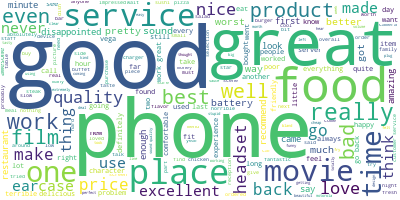

In [11]:
#Generate Word Cloud for train data
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_train['Sentence.nostopwords.LEMMATIZED'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


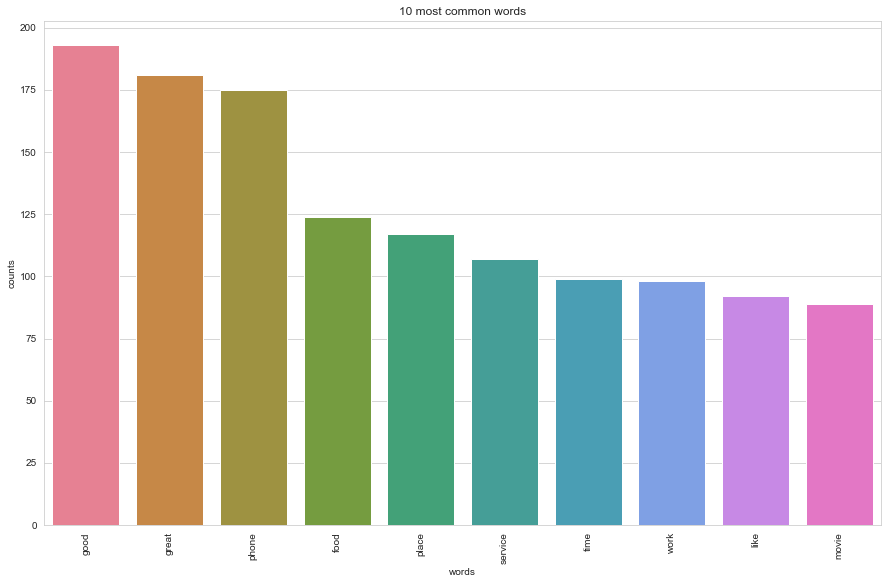

In [12]:
#Plot 10 most common words in train dataset

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_train['Sentence.nostopwords.LEMMATIZED'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [13]:
# Submission to Question [1], Part [b]

In [14]:
#Text to Vector 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=750, lowercase=True, stop_words = 'english', ngram_range=(1, 2))
#fit the vectorizers to the data.

features = vectorizer.fit_transform(df_train['Sentence.nostopwords.LEMMATIZED'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())


In [15]:
#Topic Modelling
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=200, 
                                      learning_method='batch', 
                                      random_state=123,
                                      n_jobs=2,
                                      verbose=0)
lda_output = lda_model.fit(features)

# Log Likelyhood: Higher the better
ll = lda_model.score(features)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(features)

In [16]:
# Theta = document-topic matrix
# Beta = components_ = topic-term matrix
theta = pd.DataFrame(lda_model.transform(features))
beta = pd.DataFrame(lda_model.components_)

print('theta:')
theta.head()

#beta
print('beta:')
beta.head(20)




theta:


,0,1,2,3,4,5,6,7,8,9
0,0.037149,0.037148,0.037148,0.037148,0.037164,0.665644,0.037148,0.037148,0.037153,0.037149
1,0.050004,0.050003,0.549975,0.050010,0.050002,0.050000,0.050003,0.050000,0.050003,0.050001
2,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.549986,0.050001,0.050013
3,0.050000,0.050000,0.050000,0.050000,0.549987,0.050008,0.050000,0.050000,0.050005,0.050000
4,0.291191,0.031393,0.457647,0.031395,0.031406,0.031396,0.031392,0.031390,0.031400,0.031391


beta:


,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.100003,0.100002,0.100001,1.982126,0.100001,0.100098,0.100006,0.100005,0.100023,0.100001,...,0.100006,0.100000,0.476107,0.100001,1.822276,0.100005,0.100004,0.100000,0.100000,0.100000
1,2.314490,0.408158,0.100002,0.100000,0.100000,0.100000,0.100024,0.100003,0.885970,0.100000,...,0.100010,0.100000,0.100003,1.338817,3.372645,0.100005,0.100001,0.100004,0.100000,0.100000
2,0.100000,0.833768,0.100003,0.100001,0.100001,0.635819,0.100000,0.100000,0.100000,0.100011,...,0.100011,0.100000,0.100000,0.100000,0.100003,0.100000,0.100006,0.100000,0.100000,0.100000
3,0.100004,0.955873,0.100003,0.640174,0.535893,0.100009,0.100000,0.100004,3.516519,0.100000,...,0.100002,0.100000,0.100001,0.100002,0.100014,0.100000,0.100000,0.100000,0.100000,0.100000
4,0.100000,2.291451,0.100011,0.100003,0.587653,0.100071,1.804783,12.705577,0.100002,1.050538,...,10.012164,0.100000,0.100001,0.100000,2.114794,1.878844,0.100010,0.100000,0.100012,0.100000
5,0.100000,3.189674,0.836974,0.100003,0.100001,0.100012,0.100000,1.361827,0.100001,0.100000,...,0.100001,2.614895,0.848776,0.100000,0.491555,0.100000,0.100000,0.100002,2.135038,2.195955
6,0.100002,0.952254,0.100002,0.100000,2.728258,0.100000,0.925205,0.100009,0.532675,0.100000,...,0.100007,0.100019,0.100004,0.100000,1.649151,0.520399,1.687123,0.100000,0.100000,0.100000
7,0.100006,0.100042,0.100002,0.100005,0.100003,0.100144,0.486113,0.100009,0.100002,0.100000,...,0.100013,0.100000,0.961705,0.100001,0.658179,0.100000,0.100025,0.100003,0.545996,0.100001
8,0.100000,0.100015,0.642450,0.100002,0.100001,0.100042,0.100030,0.100000,0.100000,3.420958,...,0.100000,0.100000,1.526328,3.047522,0.100000,0.100000,0.100000,2.421292,0.100000,0.100000
9,0.100000,0.100005,2.546555,0.100010,0.669803,0.100242,0.100000,0.100008,0.100010,0.100003,...,0.100005,0.630099,0.100014,0.100000,0.100014,0.100000,0.100008,0.100000,0.100000,0.100000


In [17]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta.sum(axis=0)
support50 = (theta > 0.5).sum(axis=0)
support10 = (theta > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [18]:
#Display topic Summary
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,148,313,222.173050,bad great quite impressed think pizza
1,1,154,320,226.307361,recommend excellent product definitely car right
2,2,150,280,213.057362,good terrible restaurant food really buy
3,3,146,278,211.158591,food best happy good service say
4,4,200,352,248.847230,work service friendly amazing worth great
5,5,178,341,232.914260,great disappointed ear love place awesome
6,6,143,290,211.932333,phone problem new fantastic use bought
7,7,146,291,212.637261,money time poor waste quality horrible
8,8,137,264,206.746329,eat probably piece food day nice
9,9,153,299,216.226224,make movie long battery disappointing worst


In [19]:
# Submission to Question [1], Part [c]

In [20]:
#Select features to use in model
df1=df_train[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True),theta], axis=1)




In [21]:
#Repace infiniti values with zero, if any to avoid errors when building the model
df2.info()
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2["ratiopunChar"]=df2["ratiopunChar"].fillna(0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Columns: 773 entries, able to 9
dtypes: float64(762), int64(11)
memory usage: 13.0 MB


In [22]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("label") was dropped since it will be predicted using the model.
X = df2.drop(["Polarity"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df2["Polarity"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["Polarity"].values)

In [23]:
#Logistic Regression classifier with hyperparameter tuning, other models tried: RF and DT
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


parameters_grid = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga','lbfgs','liblinear']}

# Create grid search object

LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=2, scoring='f1_weighted')

# Fit on data

%time LogReg_grid.fit(X_train, y_train)

LogReg_grid.best_params_ # printing out best parameters

Wall time: 2min 20s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'liblinear']},
             scoring='f1_weighted')

{'C': 1,
 'dual': False,
 'fit_intercept': False,
 'penalty': 'l2',
 'solver': 'liblinear'}

[[185  38]
 [ 39 179]]


(185, 38, 39, 179)

<AxesSubplot:>


F1 Score = 0.82540
AUC Score = 0.825
Accuracy = 0.825

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       223
           1       0.82      0.82      0.82       218

    accuracy                           0.83       441
   macro avg       0.83      0.83      0.83       441
weighted avg       0.83      0.83      0.83       441



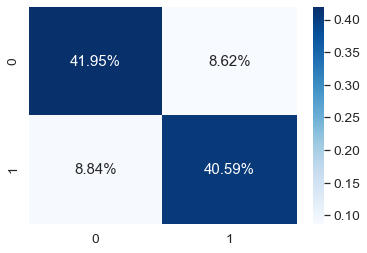

In [24]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score

# Predicting performance of hypertuned Logistic Regression model


pred_val = LogReg_grid.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_val, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print("Accuracy = {:.3f}".format(accuracy_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

#1 BOW: F1=0.71202, AUC= 0.711
#2 BOW + Count Features: F1=0.7188, AUC= 0.718
#3 BOW + Count Features + Polarity: F1=0.814, AUC= 0.814

In [25]:
#Submission to Question [1], Part [d] 

# Test Data

In [26]:
#Feature Engineering

#Word Count of each review
df_test['word_count'] = df_test['Sentence'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
df_test['char_count'] = df_test['Sentence'].str.len() ## this also includes spaces

#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df_test):
    reviewcharacters = []
    text_col = data_df_test['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df_test['reviewChars'] = reviewcharacters
    return data_df_test['reviewChars']
df_test['reviewChars'] = count_characters(df_test)

#Number of Punctuations

def numpunct(data_df_test):
    reviewPuncts = []
    for i in data_df_test['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df_test['reviewPuncts'] = reviewPuncts
    return data_df_test['reviewPuncts']
df_test['reviewPuncts'] = numpunct(df_test)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df_test):
    return data_df_test['reviewPuncts'] / data_df_test['reviewChars']
df_test['ratiopunChar'] = ratio_puncts_chars(df_test)

#Number of Capital Words
def numcapwords(data_df_test):
    reviewCwords = []
    for i in data_df_test['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df_test['reviewCwords'] = reviewCwords
    return data_df_test['reviewCwords']
df_test['reviewCwords'] = numcapwords(df_test)


#Sentiment Analysis 
from textblob import TextBlob
df_test['polarity_score']=df_test['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Frequency distribution of Part of Speech Tags
df_test['noun_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'noun'))
df_test['verb_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'verb'))
df_test['adj_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'adj'))
df_test['adv_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'adv'))
df_test['pron_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'pron'))


In [27]:
#Text Preprocessing

#Word Count of each review
df_test['word_count'] = df_test['Sentence'].apply(lambda x: len(str(x).split(" ")))
df_test[['Sentence','word_count']].head()


#Character Count of each review
df_test['char_count'] = df_test['Sentence'].str.len() ## this also includes spaces
df_test[['Sentence','char_count']].head()

# Remove ,,, from entries in name column
df_test['Sentence'] = df_test['Sentence'].str.replace(r'\,,,','')
df_test['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_test['Sentence']=df_test['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
df_test['Sentence']=df_test['Sentence'].str.lower()

#Remove digits and words containing digits 
df_test['Sentence']=df_test['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
df_test['Sentence']=df_test['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(df_test['Sentence']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
df_test['Sentence'] = df_test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_test['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(df_test['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df_test['Sentence'] = df_test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_test['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_test['Sentence.nostopwords'] = df_test['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
df_test['Sentence.nostopwords.LEMMATIZED'] = df_test['Sentence.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



,Sentence,word_count
0,A good commentary of today's love and undoubtedly a film worth seeing.,14
1,"For people who are first timers in film making, I think they did an excellent job!!",18
2,"It was very popular when I was in the cinema, a good house and very good reactions and plenty of...",23
3,It's a feel-good film and that's how I felt when I came out of the cinema!,18
4,It has northern humour and positive about the community it represents.,13


,Sentence,char_count
0,A good commentary of today's love and undoubtedly a film worth seeing.,72
1,"For people who are first timers in film making, I think they did an excellent job!!",85
2,"It was very popular when I was in the cinema, a good house and very good reactions and plenty of...",106
3,It's a feel-good film and that's how I felt when I came out of the cinema!,76
4,It has northern humour and positive about the community it represents.,72


array(["A good commentary of today's love and undoubtedly a film worth seeing.  ",
       'For people who are first timers in film making, I think they did an excellent job!!  ',
       'It was very popular when I was in the cinema, a good house and very good reactions and plenty of laughs.  ',
       "It's a feel-good film and that's how I felt when I came out of the cinema!  ",
       'It has northern humour and positive about the community it represents.  ',
       'I rather enjoyed it.  ', 'I liked it.  ',
       "I couldn't take them seriously.  ",
       'It really created a unique feeling though.  ',
       'Vivian Schilling did an excellent job with the script.  ',
       'A world better than 95% of the garbage in the theatres today.  ',
       'Her role was played well.  ',
       'Not too screamy not to masculine but just right.  ',
       'The camera really likes her in this movie.  ',
       'I would have casted her in that role after ready the script.  ',
       "As a Euro

the     527
is      338
and     283
a       279
of      232
it      189
i       177
this    177
to      152
in      141
dtype: int64

0                                 a good commentary of today is love and undoubtedly a film worth seeing
1                       for people who are first timers in film making i think they did an excellent job
2    it was very popular when i was in the cinema a good house and very good reactions and plenty of ...
3                             it is a feelgood film and that is how i felt when i came out of the cinema
4                                  it has northern humour and positive about the community it represents
Name: Sentence, dtype: object

explosion    1
ended        1
houses       1
heads        1
steve        1
            ..
track        1
subplot      1
mountain     1
pray         1
kidnapped    1
Length: 100, dtype: int64

0                                 a good commentary of today is love and undoubtedly a film worth seeing
1                       for people who are first timers in film making i think they did an excellent job
2    it was very popular when i was in the cinema a good house and very good reactions and plenty of ...
3                             it is a feelgood film and that is how i felt when i came out of the cinema
4                                  it has northern humour and positive about the community it represents
Name: Sentence, dtype: object

In [28]:
#Text Vectorizer  

#fit the vectorizers to the data

features3= vectorizer.transform(df_test['Sentence.nostopwords.LEMMATIZED'])
pandaframe3 = pd.DataFrame(features3.toarray(), columns=vectorizer.get_feature_names())

In [29]:
#Topic modelling for test data set
theta_test = pd.DataFrame(lda_model.transform(features3))




In [30]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta_test.sum(axis=0)
support50 = (theta_test > 0.5).sum(axis=0)
support10 = (theta_test > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [31]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,31,146,70.189973,bad great quite impressed think pizza
1,1,18,73,46.323073,recommend excellent product definitely car right
2,2,13,70,42.731005,good terrible restaurant food really buy
3,3,11,73,42.614152,food best happy good service say
4,4,30,103,57.123958,work service friendly amazing worth great
5,5,19,86,48.592750,great disappointed ear love place awesome
6,6,8,69,41.187944,phone problem new fantastic use bought
7,7,43,170,78.035850,money time poor waste quality horrible
8,8,10,73,42.912736,eat probably piece food day nice
9,9,40,159,76.288558,make movie long battery disappointing worst


In [32]:
#Choose Features and combine word features with other features 
df4=df_test[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
df5= pd.concat([pandaframe3.reset_index(drop=True), df4.reset_index(drop=True),theta_test], axis=1)



In [33]:
# Prediction on test dataset
X_test = df5.drop(['Polarity'], axis=1)

# Use model to make predictions
pred_test = LogReg_grid.predict(X_test)


[[216  33]
 [ 87 210]]


(216, 33, 87, 210)

<AxesSubplot:>


F1 Score = 0.78022
AUC Score = 0.787
Accuracy = 0.780

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       249
           1       0.86      0.71      0.78       297

    accuracy                           0.78       546
   macro avg       0.79      0.79      0.78       546
weighted avg       0.80      0.78      0.78       546



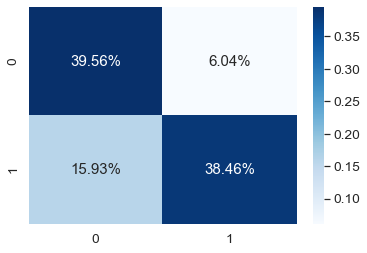

In [34]:
#Check performance on test dataset

y_val=df5['Polarity']
#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_test)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_test).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_test, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_test)))
print("Accuracy = {:.3f}".format(accuracy_score(y_val, pred_test)))

print()
print(classification_report(y_val, pred_test))

In [35]:
# Submission to Question [2]

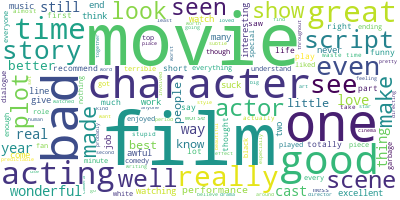

In [36]:
#Generate Word Cloud for test data
long_string = ','.join(list(df_test['Sentence.nostopwords.LEMMATIZED'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


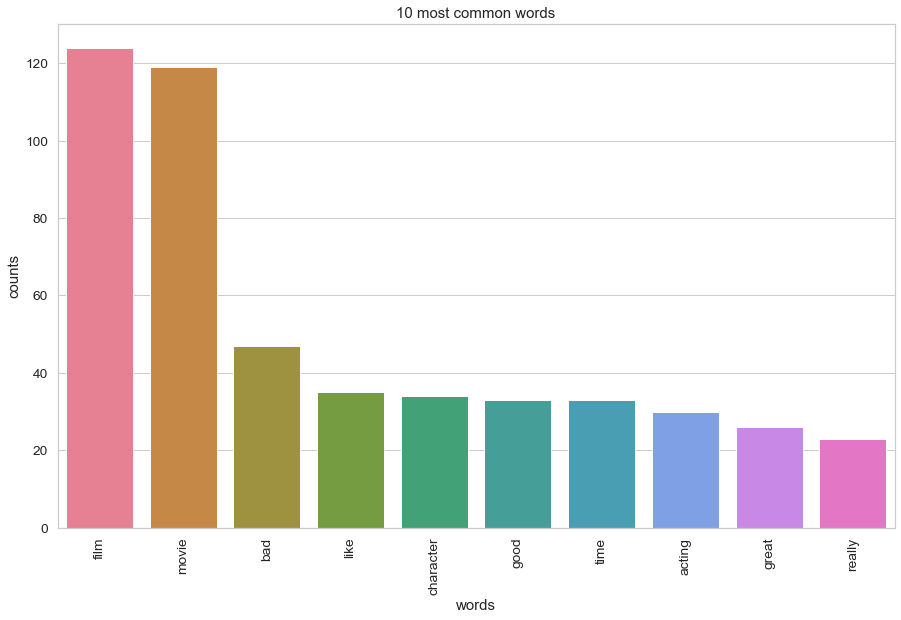

In [37]:
#Plot 10 most common words in test dataset
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_test['Sentence.nostopwords.LEMMATIZED'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [38]:
#Submission to Question [3] 

In [39]:
#Generate Comparison table to determine why some predicitons were incorrect 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pred_test_pd = pd.DataFrame({'predicted': pred_test})
df_test_original = pd.read_csv("sentiment_test.csv") # Original Test data without features
df_test_original_Sentence=df_test_original.drop(columns='Polarity')

array=LogReg_grid.predict_proba(X_test)
probs= pd.DataFrame({'Prob 0': array[:, 0], 'Prob 1': array[:, 1]})
                                
Comparison=pd.concat([df_test_original_Sentence.reset_index(drop=True),df_test.reset_index(drop=True),pred_test_pd.reset_index(drop=True),probs.reset_index(drop=True),pandaframe3.reset_index(drop=True),theta_test.reset_index(drop=True)],axis=1)

Comparison.head(30)
Comparison.tail(30)

,Sentence,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence.nostopwords,Sentence.nostopwords.LEMMATIZED,predicted,Prob 0,Prob 1,able,absolutely,acting,actor,actually,addition,ago,amazing,amazon,ambiance,angle,annoying,anytime,anytime soon,appealing,area,arrived,art,ask,asked,atmosphere,attention,attentive,audio,authentic,average,avoid,away,awesome,awful,bacon,bad,bad film,bad food,bakery,bar,barely,bargain,basically,bathroom,battery,battery life,bay,bean,beat,beautiful,beef,beer,believe,belt,best,better,big,bit,bite,black,bland,blue,bluetooth,bluetooth headset,boring,bother,bought,boy,boyfriend,bread,break,breakfast,bring,broke,buffet,burger,business,button,buy,buy phone,buying,cable,came,camera,car,car charger,care,case,cast,cell,cell phone,certainly,changing,character,charge,charged,charger,charging,charles,charm,cheap,check,checked,cheese,chef,chicken,chinese,chip,choice,cinematography,cingular,clarity,classic,clean,clear,clearly,clip,close,cold,color,come,comfortable,comfortably,coming,company,complaint,completely,connection,consider,considering,construction,contact,control,conversation,cooked,cool,cost,couple,course,cover,cover girl,crap,cream,crowd,cult,customer,customer service,cut,cute,damn,data,date,day,dead,deal,decent,decision,decor,definitely,definitely worth,delicious,depth,description,deserves,design,despite,dessert,device,dialogue,different,difficult,dining,dinner,direction,director,dirty,disappointed,disappointing,disappointment,dish,doesnt,doesnt work,dont,dont buy,dont waste,drain,drink,drive,drop,dropped,dry,ear,earpiece,ease,easier,easily,easy,easy use,eat,eaten,eating,editing,effect,effort,egg,embarrassing,end,ended,ending,enjoy,enjoyed,especially,establishment,exactly,excellent,excellent product,excuse,expect,expectation,expected,expensive,experience,extra,extremely,extremely slow,eye,fabulous,face,fact,fails,fall,family,fan,fantastic,far,fast,favorite,feature,feel,feel like,feeling,felt,film,finally,fine,fish,fit,fit ear,flat,flavor,flaw,flick,folk,food,food delicious,food good,food great,food service,foot,forever,forget,form,free,fresh,fried,friend,friendly,friendly staff,fry,fun,funny,game,gave,generally,getting,girl,given,glad,going,gone,good,good food,good price,good product,good quality,good thing,good way,got,gotten,graphic,great,great deal,great food,great phone,great place,great price,great product,great service,green,guess,guy,half,hand,happened,happier,happy,hard,hate,head,headphone,headset,hear,heart,help,helpful,high,highly,highly recommend,history,hit,hold,hold charge,home,homemade,honestly,hope,hoping,horrible,horror,hot,hot dog,hour,house,huge,human,husband,ice,im,imagination,immediately,important,impressed,impressive,included,incredible,inside,instead,instruction,interesting,internet,ipod,item,item worked,jabra,job,john,joke,junk,kept,keyboard,kid,kind,know,lack,lacked,lacking,lady,large,later,le,leather,leave,left,let,level,lg,life,light,lightweight,like,like charm,like place,liked,line,lion,list,literally,little,live,location,lock,long,longer,look,looking,lost,lot,loud,love,love phone,loved,lovely,low,lunch,make,making,man,managed,management,manager,market,massive,maybe,meal,mean,meat,mediocre,memory,menu,mess,mexican,mic,mind,minute,mistake,money,month,motorola,mouth,movie,movie like,music,nearly,need,needed,network,new,nice,night,noise,nokia,note,number,obviously,offer,oh,ok,old,option,order,ordered,original,outlet,outside,overall,overpriced,owned,owner,packaged,paid,pairing,palm,paper,particular,party,passed,pasta,pathetic,pay,pc,people,perfect,perfectly,performance,person,pho,phoenix,phone,phone day,phone work,picture,piece,piece junk,pizza,place,place eat,plan,plantronics,plastic,play,player,playing,pleasant,pleased,plot,plug,plus,pocket,point,poor,poor quality,poorly,pork,portion,possible,potato,predictable,pretentious,pretty,pretty good,price,price good,priced,pro

,Sentence,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence.nostopwords,Sentence.nostopwords.LEMMATIZED,predicted,Prob 0,Prob 1,able,absolutely,acting,actor,actually,addition,ago,amazing,amazon,ambiance,angle,annoying,anytime,anytime soon,appealing,area,arrived,art,ask,asked,atmosphere,attention,attentive,audio,authentic,average,avoid,away,awesome,awful,bacon,bad,bad film,bad food,bakery,bar,barely,bargain,basically,bathroom,battery,battery life,bay,bean,beat,beautiful,beef,beer,believe,belt,best,better,big,bit,bite,black,bland,blue,bluetooth,bluetooth headset,boring,bother,bought,boy,boyfriend,bread,break,breakfast,bring,broke,buffet,burger,business,button,buy,buy phone,buying,cable,came,camera,car,car charger,care,case,cast,cell,cell phone,certainly,changing,character,charge,charged,charger,charging,charles,charm,cheap,check,checked,cheese,chef,chicken,chinese,chip,choice,cinematography,cingular,clarity,classic,clean,clear,clearly,clip,close,cold,color,come,comfortable,comfortably,coming,company,complaint,completely,connection,consider,considering,construction,contact,control,conversation,cooked,cool,cost,couple,course,cover,cover girl,crap,cream,crowd,cult,customer,customer service,cut,cute,damn,data,date,day,dead,deal,decent,decision,decor,definitely,definitely worth,delicious,depth,description,deserves,design,despite,dessert,device,dialogue,different,difficult,dining,dinner,direction,director,dirty,disappointed,disappointing,disappointment,dish,doesnt,doesnt work,dont,dont buy,dont waste,drain,drink,drive,drop,dropped,dry,ear,earpiece,ease,easier,easily,easy,easy use,eat,eaten,eating,editing,effect,effort,egg,embarrassing,end,ended,ending,enjoy,enjoyed,especially,establishment,exactly,excellent,excellent product,excuse,expect,expectation,expected,expensive,experience,extra,extremely,extremely slow,eye,fabulous,face,fact,fails,fall,family,fan,fantastic,far,fast,favorite,feature,feel,feel like,feeling,felt,film,finally,fine,fish,fit,fit ear,flat,flavor,flaw,flick,folk,food,food delicious,food good,food great,food service,foot,forever,forget,form,free,fresh,fried,friend,friendly,friendly staff,fry,fun,funny,game,gave,generally,getting,girl,given,glad,going,gone,good,good food,good price,good product,good quality,good thing,good way,got,gotten,graphic,great,great deal,great food,great phone,great place,great price,great product,great service,green,guess,guy,half,hand,happened,happier,happy,hard,hate,head,headphone,headset,hear,heart,help,helpful,high,highly,highly recommend,history,hit,hold,hold charge,home,homemade,honestly,hope,hoping,horrible,horror,hot,hot dog,hour,house,huge,human,husband,ice,im,imagination,immediately,important,impressed,impressive,included,incredible,inside,instead,instruction,interesting,internet,ipod,item,item worked,jabra,job,john,joke,junk,kept,keyboard,kid,kind,know,lack,lacked,lacking,lady,large,later,le,leather,leave,left,let,level,lg,life,light,lightweight,like,like charm,like place,liked,line,lion,list,literally,little,live,location,lock,long,longer,look,looking,lost,lot,loud,love,love phone,loved,lovely,low,lunch,make,making,man,managed,management,manager,market,massive,maybe,meal,mean,meat,mediocre,memory,menu,mess,mexican,mic,mind,minute,mistake,money,month,motorola,mouth,movie,movie like,music,nearly,need,needed,network,new,nice,night,noise,nokia,note,number,obviously,offer,oh,ok,old,option,order,ordered,original,outlet,outside,overall,overpriced,owned,owner,packaged,paid,pairing,palm,paper,particular,party,passed,pasta,pathetic,pay,pc,people,perfect,perfectly,performance,person,pho,phoenix,phone,phone day,phone work,picture,piece,piece junk,pizza,place,place eat,plan,plantronics,plastic,play,player,playing,pleasant,pleased,plot,plug,plus,pocket,point,poor,poor quality,poorly,pork,portion,possible,potato,predictable,pretentious,pretty,pretty good,price,price good,priced,pro

In [40]:
Wrong=Comparison[Comparison.Polarity!=Comparison.predicted]
Wrong=Wrong.iloc[:, 0:20]
Wrong



,Sentence,Sentence,Polarity,word_count,char_count,reviewChars,reviewPuncts,ratiopunChar,reviewCwords,polarity_score,noun_count,verb_count,adj_count,adv_count,pron_count,Sentence.nostopwords,Sentence.nostopwords.LEMMATIZED,predicted,Prob 0,Prob 1
3,It's a feel-good film and that's how I felt when I came out of the cinema!,it is a feelgood film and that is how i felt when i came out of the cinema,1,18,76,72,4,0.055556,2,0.000000,2,4,1,3,3,feelgood film felt came cinema,feelgood film felt came cinema,0,0.833513,0.166487
11,Her role was played well.,her role was played well,1,7,27,26,1,0.038462,0,0.000000,1,2,0,1,1,role played well,role played well,0,0.683624,0.316376
12,Not too screamy not to masculine but just right.,not too screamy not to masculine but just right,1,11,50,49,1,0.020408,0,0.192857,0,1,1,5,0,screamy masculine right,screamy masculine right,0,0.693532,0.306468
14,I would have casted her in that role after ready the script.,i would have casted her in that role after ready the script,1,14,62,61,1,0.016393,1,0.200000,2,2,1,0,2,would casted role ready script,would casted role ready script,0,0.643648,0.356352
33,It came free with a DVD player I bought but I still turned the thing off halfway through because...,it came free with a dvd player i bought but i still turned the thing off halfway through because...,0,26,128,127,1,0.007874,4,0.400000,5,5,1,1,4,came free dvd player bought still turned thing halfway embarrassed howell,came free dvd player bought still turned thing halfway embarrassed howell,1,0.493075,0.506925
36,"The soundtrack wasn't terrible, either.",the soundtrack was not terrible either,1,7,41,38,3,0.078947,0,-1.000000,1,1,1,2,0,soundtrack terrible either,soundtrack terrible either,0,0.995462,0.004538
38,"Still, it was the SETS that got a big ""10"" on my ""oy-vey"" scale.",still it was the sets that got a big on my oyvey scale,1,16,66,59,7,0.118644,1,0.000000,2,2,2,1,2,still sets got big oyvey scale,still set got big oyvey scale,0,0.601385,0.398615
43,The last 15 minutes of movie are also not bad as well.,the last minutes of movie are also not bad as well,1,14,56,55,1,0.018182,0,0.175000,2,1,2,4,0,last minutes movie also bad well,last minute movie also bad well,0,0.661189,0.338811
45,"The acting was decidely wooden, though no worse than a period Universal B movie.",the acting was decidely wooden though no worse than a period universal b movie,0,16,82,80,2,0.025000,1,0.050000,5,1,2,1,0,acting decidely wooden though worse period universal b movie,acting decidely wooden though worse period universal b movie,1,0.385504,0.614496
49,"I won't say any more - I don't like spoilers, so I don't want to be one, but I believe this film...",i will not say any more i do not like spoilers so i do not want to be one but i believe this fil...,1,28,118,111,7,0.063063,4,0.400000,3,8,1,3,5,say like spoilers want one believe film worth time,say like spoiler want one believe film worth time,0,0.695677,0.304323
